In [1]:
import pandas as pd
import numpy as np

In [2]:
test_data = pd.read_csv('test.csv')

In [3]:
train_data = pd.read_csv('train.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Analysis - Survivors in Train Data


In [6]:
import matplotlib.pyplot as plt

<AxesSubplot:>

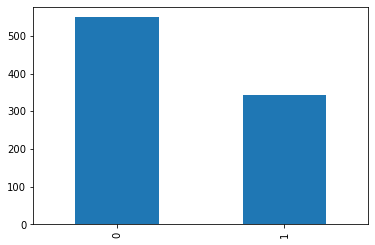

In [7]:
train_data.Survived.value_counts().plot(kind='bar')

From the bar plot, we can clearly notice that the majority of people in this dataset has died on the accident.

In [8]:
surv_sex = train_data[['Survived','Sex']]

In [9]:
#filtering the people who survived
surv_sex = surv_sex[surv_sex.Survived == 1]

In [10]:
surv_sex

,Survived,Sex
1,1,female
2,1,female
3,1,female
8,1,female
9,1,female
...,...,...
875,1,female
879,1,female
880,1,female
887,1,female


<AxesSubplot:>

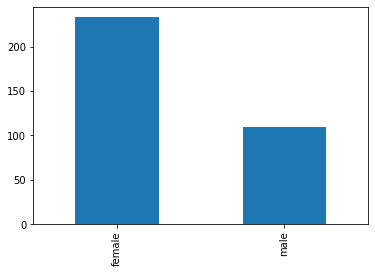

In [11]:
surv_sex.Sex.value_counts().plot(kind='bar')

From the bar plot we can clearly notice that people identified as Female were the majority among the survivors.

# Investigating Age Distribution Among The Passengers

Since we have missing values in the dataset regarding Age, we will replace the unavailable values with the mean age of the sample.

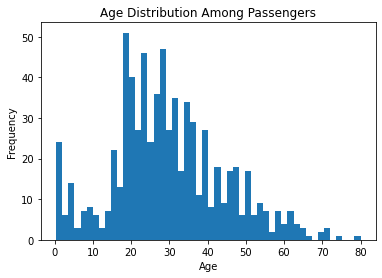

In [12]:
#investigating the age distribution among the passengers

age = train_data.Age
plt.hist(age, bins=50)
plt.title('Age Distribution Among Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [13]:
#investigating age distribution among the survivors

surv_age = train_data[['Survived','Age']]
surv_age = surv_age[surv_age.Survived ==1]

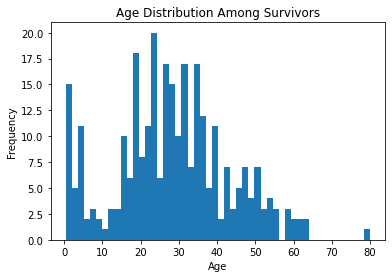

In [14]:
plt.hist(surv_age.Age, bins=50)
plt.title('Age Distribution Among Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

From the histogram we can assume that the majority of the surviros were children and adults below 40 years old. From previous information we also know that the majority of survivors were Women. We can conclude that Age and Sex are detterminant factors to predict the probability of survival.


# Investigating the relation between  the passenger's Fare and 'Survivability'

In [15]:
surv_fare = train_data[['Survived','Fare']]
surv_fare

,Survived,Fare
0,0,7.2500
1,1,71.2833
2,1,7.9250
3,1,53.1000
4,0,8.0500
...,...,...
886,0,13.0000
887,1,30.0000
888,0,23.4500
889,1,30.0000


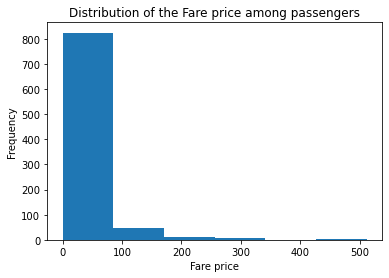

In [16]:
plt.hist(surv_fare.Fare, bins=6)
plt.title('Distribution of the Fare price among passengers')
plt.ylabel('Frequency')
plt.xlabel('Fare price')
plt.show()

In [17]:
surv_fare = surv_fare[surv_fare.Survived == 1]

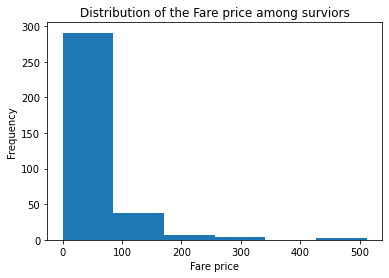

In [18]:
plt.hist(surv_fare.Fare, bins=6)
plt.title('Distribution of the Fare price among surviors')
plt.ylabel('Frequency')
plt.xlabel('Fare price')
plt.show()


# Investigating the relation between Passenger Class and Survivability

In [19]:
surv_class = train_data[['Survived','Pclass']]

In [20]:
#investigating the passenger's class among the sample

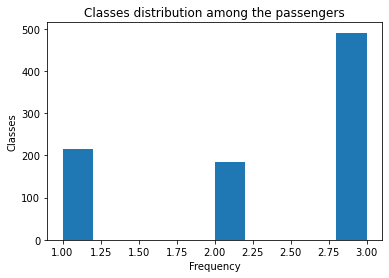

In [21]:
plt.hist(surv_class.Pclass)
plt.title('Classes distribution among the passengers')
plt.ylabel('Classes')
plt.xlabel('Frequency')
plt.show()

The histogram shows us that the majority of the passengers aboard Titanic were from the lower class (3)

In [22]:
#investigating the passenger's class among the Survivors

surv_class = surv_class[surv_class.Survived==1]
surv_class

,Survived,Pclass
1,1,1
2,1,3
3,1,1
8,1,3
9,1,2
...,...,...
875,1,3
879,1,1
880,1,2
887,1,1


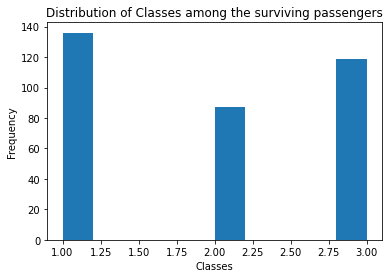

In [23]:
plt.hist(surv_class.Pclass)
plt.title('Distribution of Classes among the surviving passengers')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

Among the survivors, we can notice that the most part of them were from the first and second class. In fact, we had more passengers on the 3rd class, but most of the survivors were from the 1st and 2nd classes. The passenger's class is also a determinant factor for calculating the probability of survival.

# Modelling the Problem

For this first model, we will select only those variables which we had investigated so far: Sex, Age, Fare and Passenger's Class.

In [24]:
#for our features (or X), we will select Sex, Age, Fare and Passenger's Class
X_train = train_data[['Sex','Age','Fare','Pclass']] # We will not use PassengerID, since the model can make numerical 
                                              #associations with it
y_train = train_data['Survived']

In [25]:
X_train

,Sex,Age,Fare,Pclass
0,male,22.0,7.2500,3
1,female,38.0,71.2833,1
2,female,26.0,7.9250,3
3,female,35.0,53.1000,1
4,male,35.0,8.0500,3
...,...,...,...,...
886,male,27.0,13.0000,2
887,female,19.0,30.0000,1
888,female,NaN,23.4500,3
889,male,26.0,30.0000,1


In [26]:
#it's possible to identify that we got NaN values in the "Age" column. We will treat this by adding the mean age for the missing
#values

X_train['Age'].isnull().values.any()


True

In [27]:
X_train['Age'].replace(np.nan, np.mean(X_train['Age']), inplace=True)

C:\Users\Suporte Vivver\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [28]:
X_train['Sex'].replace('male',1,inplace=True)
X_train['Sex'].replace('female',0,inplace=True)

In [29]:
X_train

,Sex,Age,Fare,Pclass
0,1,22.000000,7.2500,3
1,0,38.000000,71.2833,1
2,0,26.000000,7.9250,3
3,0,35.000000,53.1000,1
4,1,35.000000,8.0500,3
...,...,...,...,...
886,1,27.000000,13.0000,2
887,0,19.000000,30.0000,1
888,0,29.699118,23.4500,3
889,1,26.000000,30.0000,1


In [30]:
#in this step, we import the libraries. For this problem, we will use a Logistic Regression model.

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [31]:
model = LogisticRegression() 

In [32]:
model = model.fit(X_train,y_train)

In [33]:
model.score(X_train,y_train)

0.8002244668911336

In [34]:
#overall accuracy of the model was 80%
#how to improve accuracy?
#Principal Components for siblings and parents? Does not Improve Train Accuracy.
#Embarked ports may be a relevant information? Does not improve Train accuracy.
#Try another model? RandomForestClassifier shows improvment on Train accuracy.

In [35]:
X_train2 = train_data[['Sex','Age','Fare','Pclass','Embarked']]


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier()

In [38]:
rfc = rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.9797979797979798

In [39]:
gender_sub = pd.read_csv('gender_submission.csv')

In [85]:
gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [41]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
X_test = test_data[['Sex','Age','Fare','Pclass']]

In [43]:
X_test.head()

,Sex,Age,Fare,Pclass
0,male,34.5,7.8292,3
1,female,47.0,7.0000,3
2,male,62.0,9.6875,2
3,male,27.0,8.6625,3
4,female,22.0,12.2875,3


In [44]:
X_test.Sex.replace('male',1,inplace=True)

C:\Users\Suporte Vivver\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [45]:
X_test.Sex.replace('female',0,inplace=True)

In [46]:
X_test.head()

,Sex,Age,Fare,Pclass
0,1,34.5,7.8292,3
1,0,47.0,7.0000,3
2,1,62.0,9.6875,2
3,1,27.0,8.6625,3
4,0,22.0,12.2875,3


In [52]:
X_test.Fare.replace(np.nan, np.mean(X_test.Fare), inplace=True)

C:\Users\Suporte Vivver\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [54]:
X_test['Pclass'].isnull().values.any()

False

In [55]:
test_predict = rfc.predict(X_test)

In [56]:
test_predict

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [74]:
predict = pd.DataFrame(columns = ['PassengerId','Survived'])

In [77]:
passengerId = np.array(test_data.PassengerId)

In [79]:
predict.PassengerId = passengerId

In [81]:
predict.Survived = test_predict

In [82]:
predict

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [90]:
predict.to_csv('predictions.csv',index=False)

In [89]:
predict

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
